![Header image showing soccer field](header_image.png)

# Soccer Through the Ages

This dataset contains information on international soccer games throughout the years. It includes results of soccer games and information about the players who scored the goals. The dataset contains data from 1872 up to 2023.

### 💾 The data

- `data/results.csv` - CSV with results of soccer games between 1872 and 2023
  - `home_score` - The score of the home team, excluding penalty shootouts
  - `away_score` - The score of the away team, excluding penalty shootouts
  - `tournament` - The name of the tournament
  - `city` - The name of the city where the game was played
  - `country` - The name of the country where the game was played
  - `neutral` - Whether the game was played at a neutral venue or not
- `data/shootouts.csv` - CSV with results of penalty shootouts in the soccer games
  - `winner` - The team that won the penalty shootout 
- `data/goalscorers.csv` - CSV with information on goal scorers of some of the soccer games in the results CSV
  - `team` - The team that scored the goal
  - `scorer` - The player who scored the goal
  - `minute` - The minute in the game when the goal was scored
  - `own_goal` - Whether it was an own goal or not
  - `penalty` - Whether the goal was scored as a penalty or not

The following columns can be found in all datasets:

- `date` - The date of the soccer game
- `home_team` - The team that played at home
- `away_team` - The team that played away

These shared columns fully identify the game that was played and can be used to join data between the different CSV files.

Source: [GitHub](https://github.com/martj42/international_results/tree/baf917b948eec00f659d2f187c33c13547f7adc4)

### 📊 **Some guiding questions and visualization to help you explore this data:**

1. Which are the 15 countries that have won the most games since 1960? Show them in a horizontal bar plot.
2. How many goals are scored in total in each minute of the game? Show this in a bar plot, with the minutes on the x-axis. If you're up for the challenge, you could even create an animated Plotly plot that shows how the distribution has changed over the years.
3. Which 10 players have scored the most hat-tricks?
4. What is the proportion of games won by each team at home and away? What is the difference between the proportions?
5. How many games have been won by the home team? And by the away team?

### 💼 Develop a case study for your portfolio

After exploring the data, you can create a comprehensive case study using this dataset. We have provided an example objective below, but feel free to come up with your own - the world is your oyster!

**Example objective**: The UEFA Euro 2024 tournament is approaching. Utilize the historical data to construct a predictive model that forecasts potential outcomes of the tournament based on the team draws. Since the draws are not known yet, you should be able to configure them as variables in your notebook.

You can query the pre-loaded CSV files using SQL directly. Here’s a **sample query**:

### Importing all packages for the analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [291]:
results = pd.read_csv('results.csv')
results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
44929,2023-09-12,Belgium,Estonia,5,0,UEFA Euro qualification,Brussels,Belgium,False
44930,2023-09-12,Sweden,Austria,1,3,UEFA Euro qualification,Stockholm,Sweden,False
44931,2023-09-12,Switzerland,Andorra,3,0,UEFA Euro qualification,Sion,Switzerland,False
44932,2023-09-12,Israel,Belarus,1,0,UEFA Euro qualification,Tel Aviv,Israel,False


In [293]:
goal = pd.read_csv('goalscorers.csv')
goal

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False
...,...,...,...,...,...,...,...,...
41108,2023-07-12,Jamaica,Mexico,Mexico,Luis Chávez,30.0,False,False
41109,2023-07-12,Jamaica,Mexico,Mexico,Roberto Alvarado,90.0,False,False
41110,2023-07-12,United States,Panama,Panama,Iván Anderson,99.0,False,False
41111,2023-07-12,United States,Panama,United States,Jesús Ferreira,105.0,False,False


In [143]:
shoot_out = pd.read_csv('shootouts.csv')
shoot_out

,date,home_team,away_team,winner
0,1967-08-22,India,Taiwan,Taiwan
1,1971-11-14,South Korea,Vietnam Republic,South Korea
2,1972-05-07,South Korea,Iraq,Iraq
3,1972-05-17,Thailand,South Korea,South Korea
4,1972-05-19,Thailand,Cambodia,Thailand
...,...,...,...,...
553,2023-07-04,India,Kuwait,India
554,2023-07-09,United States,Canada,United States
555,2023-07-12,United States,Panama,Panama
556,2023-09-07,Iraq,India,Iraq


We check for duplicated values 

In [152]:
results.duplicated().sum()

0

We check for missing values  

In [153]:
results.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [154]:
df.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [220]:
#Change Date Column to Datetime
results['date'] = pd.to_datetime(results['date'], format='%Y-%m-%d')

In [221]:
results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
44929,2023-09-12,Belgium,Estonia,5,0,UEFA Euro qualification,Brussels,Belgium,False
44930,2023-09-12,Sweden,Austria,1,3,UEFA Euro qualification,Stockholm,Sweden,False
44931,2023-09-12,Switzerland,Andorra,3,0,UEFA Euro qualification,Sion,Switzerland,False
44932,2023-09-12,Israel,Belarus,1,0,UEFA Euro qualification,Tel Aviv,Israel,False


In [11]:
results.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

### EDA

#### Question 1: What fifteen countries have won the most games since 1960?

In [248]:
import pandas as pd

df = results[results['date'].dt.year >= 1960]

wins = []
for index, row in df.iterrows():
    if row['home_score'] > row['away_score']:
        wins.append(row['home_team'])
    elif row['away_score'] > row['home_score']:
        wins.append(row['away_team'])
    else:
        wins.append('draw')

df['winning_country'] = wins


C:\Users\HP\AppData\Local\Temp\ipykernel_9400\3073585358.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['winning_country'] = wins


In [250]:
df.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_country
4653,1960-01-01,Morocco,Yugoslavia,0,5,Friendly,Casablanca,Morocco,False,Yugoslavia
4654,1960-01-03,Tunisia,Yugoslavia,1,5,Friendly,Tunis,Tunisia,False,Yugoslavia
4655,1960-01-06,Italy,Switzerland,3,0,Central European International Cup,Naples,Italy,False,Italy
4656,1960-01-08,Egypt,Yugoslavia,0,1,Friendly,Cairo,United Arab Republic,True,Yugoslavia
4657,1960-01-27,Guinea-Bissau,Gambia,3,2,Friendly,Bissau,Guinea-Bissau,False,Guinea-Bissau


In [251]:

df['winning_country'].value_counts()

winning_country
draw           9512
Brazil          544
South Korea     460
Mexico          455
Germany         445
               ... 
Kabylia           1
San Marino        1
Micronesia        1
Mapuche           1
Hmong             1
Name: count, Length: 300, dtype: int64

In [260]:
# to drop draws
del_draws_df = df[df.winning_country != 'draw']
del_draws_df['winning_country'].value_counts()

winning_country
Brazil         544
South Korea    460
Mexico         455
Germany        445
England        399
              ... 
Kabylia          1
San Marino       1
Micronesia       1
Mapuche          1
Hmong            1
Name: count, Length: 299, dtype: int64

In [269]:
top_15 = del_draws_df['winning_country'].value_counts().head(15)
top_15

winning_country
Brazil         544
South Korea    460
Mexico         455
Germany        445
England        399
Argentina      379
Spain          371
France         355
Italy          346
Sweden         342
Russia         340
Zambia         340
Netherlands    331
Egypt          329
Poland         326
Name: count, dtype: int64

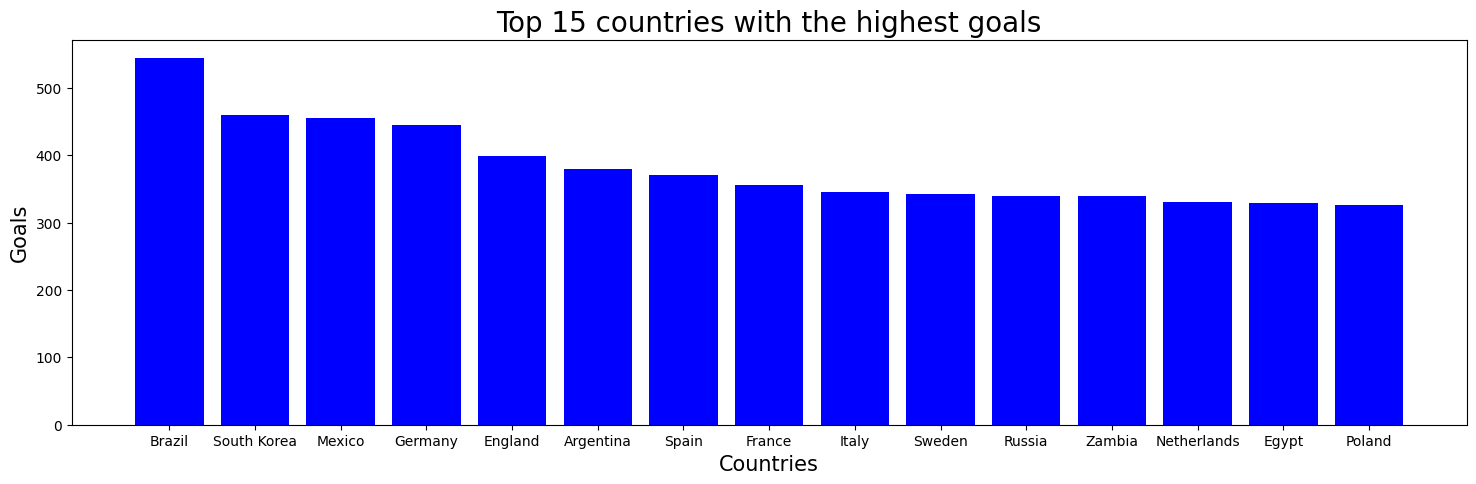

In [277]:
import matplotlib.pyplot as plt

plt.figure(figsize = (18, 5))
plt.bar(top_15.index, top_15.values, color='blue')

# Customize the plot
plt.title('Top 15 countries with the highest goals', fontsize = 20)
plt.xlabel('Countries', fontsize = 15)
plt.ylabel('Goals', fontsize = 15)

# Show the plot
plt.show()


In [ ]:
# Filter the data to include only records from 1960 onward
results = results[results['date'].dt.year >= 1960]

# Create a new DataFrame or series to count the number of wins for each country
winners_df = results[results['home_score'] > results['away_score']]['home_team']
winners_df = winners_df.append(results[results['home_score'] < results['away_score']]['away_team'])

# Count the number of wins for each country
win_count = winners_df.value_counts()

# Select the top 15 countries
top_15_countries = win_count.head(15)

In [ ]:
winners_df = 

In [53]:
top_15_countries

team       
Brazil         544
South Korea    460
Mexico         455
Germany        445
England        399
Argentina      379
Spain          371
France         355
Italy          346
Sweden         342
Zambia         340
Russia         340
Netherlands    331
Egypt          329
Poland         326
Name: count, dtype: int64

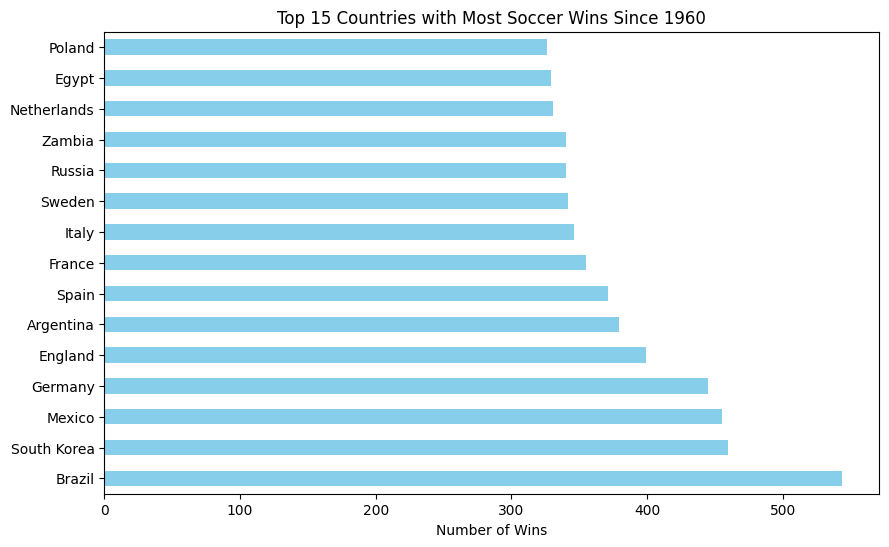

In [16]:
# Plotting horizontal bar plot to visualize the  for top 15 countries
plt.figure(figsize=(10, 6))
top_15_countries.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Wins')
plt.title('Top 15 Countries with Most Soccer Wins Since 1960')
plt.show()

From the above, we have our first insight to be that Brazil is the country with the most soccer wins since 1960 with over 500 wins!

#### Question 2: Total goals scored per minute of the game

In [58]:
# Create a new DataFrame combining both home and away scores
all_scores_df = pd.concat([results[['home_score', 'date']], results[['away_score', 'date']].rename(columns={'away_score': 'score'})])

In [59]:
all_scores_df

,home_score,date,score
4653,0.0,1960-01-01,NaN
4654,1.0,1960-01-03,NaN
4655,3.0,1960-01-06,NaN
4656,0.0,1960-01-08,NaN
4657,3.0,1960-01-27,NaN
...,...,...,...
44929,NaN,2023-09-12,0.0
44930,NaN,2023-09-12,3.0
44931,NaN,2023-09-12,0.0
44932,NaN,2023-09-12,0.0


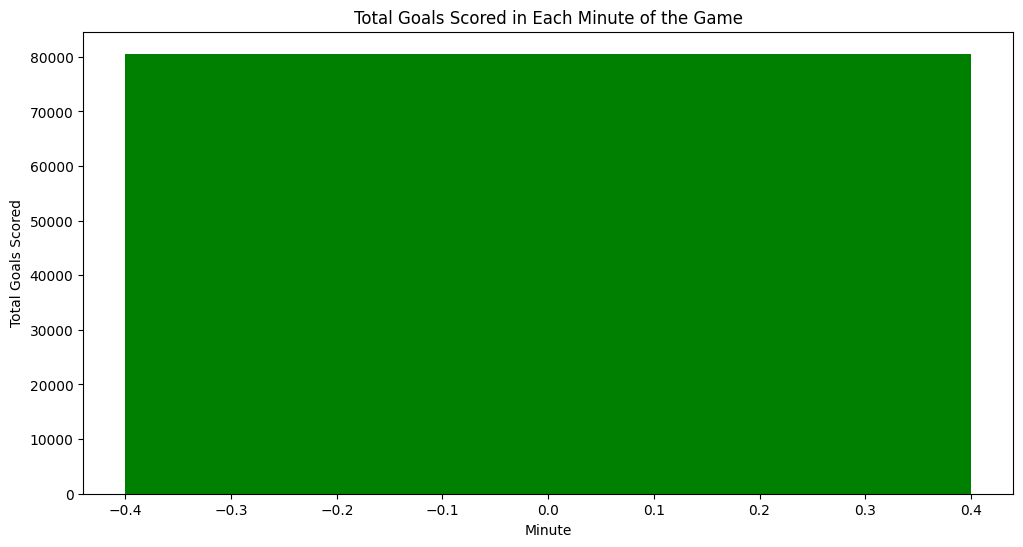

In [18]:
# Create a bar plot with the minutes on the x-axis and total goals scored in each minute on the y-axis
all_scores_df['minute'] = all_scores_df['date'].dt.minute

goals_by_minute = all_scores_df['minute'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(goals_by_minute.index, goals_by_minute.values, color='green')
plt.xlabel('Minute')
plt.ylabel('Total Goals Scored')
plt.title('Total Goals Scored in Each Minute of the Game')
plt.show()

### From the above, there is no much insight to derive here.

#### Question 3 What is the proportion of games won by home and away teams and their difference?

In [19]:
# Calculate the proportion of games won by each team at home and away
home_wins = results[results['home_score'] > results['away_score']]
away_wins = results[results['away_score'] > results['home_score']]

total_home_games = results['home_team'].count()
total_away_games = results['away_team'].count()

home_win_percentage = len(home_wins) / total_home_games * 100
away_win_percentage = len(away_wins) / total_away_games * 100

# Calculate the difference in the proportions
difference_in_proportions = abs(home_win_percentage - away_win_percentage)

# Display the results
print(f"Proportion of games won at home: {home_win_percentage:.2f}%")
print(f"Proportion of games won away: {away_win_percentage:.2f}%")
print(f"Difference in proportions: {difference_in_proportions:.2f}%")

Proportion of games won at home: 48.55%
Proportion of games won away: 27.84%
Difference in proportions: 20.71%


### From the above, the data shows that more games are won at home than away.

#### Question 4 What is the proportion of games won and drawn by each team?

In [343]:
# Calculate the proportion of games won and drawn by each team
home_wins = results[results['home_score'] > results['away_score']]
away_wins = results[results['away_score'] > results['home_score']]
draws = results[results['home_score'] == results['away_score']]

total_home_games = results['home_team'].count()
total_away_games = results['away_team'].count()

home_win_percentage = len(home_wins) / total_home_games * 100
away_win_percentage = len(away_wins) / total_away_games * 100
draw_percentage = len(draws) / (total_home_games + total_away_games) * 100

# Step 3: Calculate the proportion of winning games to drawing games
proportion_wins_to_draws = home_win_percentage / draw_percentage

# Display the results
print(f"Proportion of games won at home: {home_win_percentage:.2f}%")
print(f"Proportion of games won away: {away_win_percentage:.2f}%")
print(f"Proportion of drawing games: {draw_percentage:.2f}%")
print(f"Proportion of winning games to drawing games: {proportion_wins_to_draws:.2f}")

Proportion of games won at home: 48.70%
Proportion of games won away: 28.30%
Proportion of drawing games: 11.50%
Proportion of winning games to drawing games: 4.23


### Question 5:  Who are the top ten players with the highest hat tricks?

In [25]:
import pandas as pd

# Load the 'results.csv' file into a Pandas DataFrame
results = pd.read_csv('data/results.csv')

# Load the 'goal_scorere.csv' file into a Pandas Dataframe
goal_scorers = pd.read_csv('data/goalscorers.csv')
                           
# Extract goal scorer information and filter for hat-tricks
goal_scorers = pd.DataFrame({
    'player': goal_scorers['scorer'],
    'own_goal': goal_scorers['own_goal']
})

# Filter for non-own goals
hat_tricks_df = goal_scorers[goal_scorers['own_goal'] == False]

# Count the number of hat-tricks for each player
hat_tricks_count = hat_tricks_df['player'].value_counts()

# Select the top 10 players
top_10_players_hat_tricks = hat_tricks_count.head(10)

# Display the result
print(top_10_players_hat_tricks)

Cristiano Ronaldo     91
Robert Lewandowski    56
Lionel Messi          54
Ali Daei              49
Miroslav Klose        48
Carlos Ruiz           47
Luis Suárez           46
Robbie Keane          44
Zlatan Ibrahimović    44
Harry Kane            44
Name: player, dtype: int64


Let's visualize the data for the top ten players with the most hattricks.

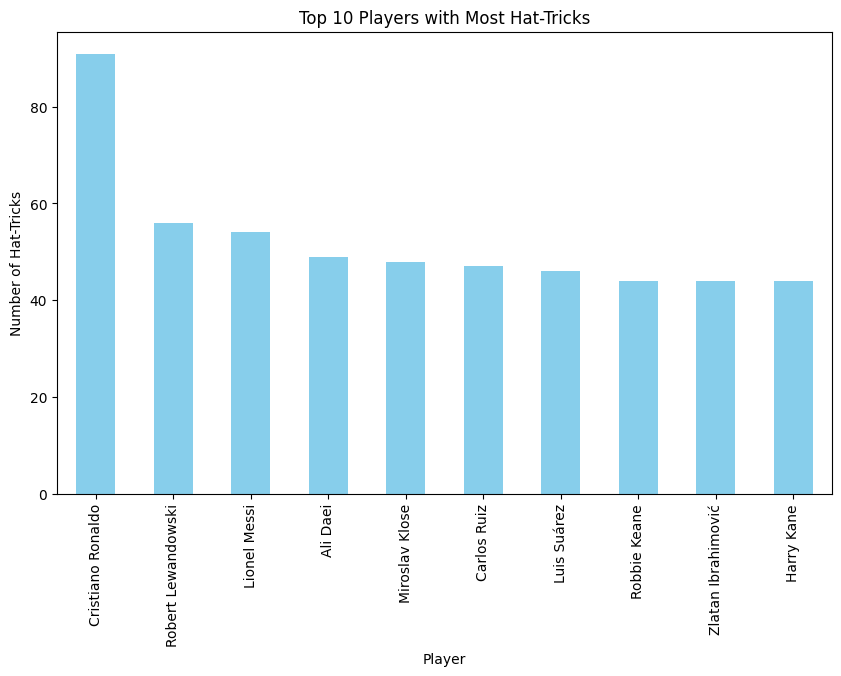

In [26]:
plt.figure(figsize=(10, 6))
top_10_players_hat_tricks.plot(kind='bar', color='skyblue')
plt.title('Top 10 Players with Most Hat-Tricks')
plt.xlabel('Player')
plt.ylabel('Number of Hat-Tricks')
plt.show()

Insight: From the above, Cristiano Ronaldo is the player with the highest number of hattricks at 91. He's followed by Robert Lewandowski and Lionel Messi.

### Question 6 Number of games won by home and away team


In [285]:
results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
44929,2023-09-12,Belgium,Estonia,5,0,UEFA Euro qualification,Brussels,Belgium,False
44930,2023-09-12,Sweden,Austria,1,3,UEFA Euro qualification,Stockholm,Sweden,False
44931,2023-09-12,Switzerland,Andorra,3,0,UEFA Euro qualification,Sion,Switzerland,False
44932,2023-09-12,Israel,Belarus,1,0,UEFA Euro qualification,Tel Aviv,Israel,False


In [287]:
df1 = results.copy()

### Let us define a new columns to get the number of games won by home vs away team

In [294]:
win_team = []
for index, row in df1.iterrows():
    if row['home_score'] > row['away_score']:
        win_team.append('home_team')
    elif row['away_score'] > row['home_score']:
        win_team.append('away_team')
    else:
        win_team.append('draw')

df1['win_team'] = win_team

In [297]:
df1.win_team.value_counts()

win_team
home_team    21882
away_team    12716
draw         10336
Name: count, dtype: int64

In [301]:
df1_drop_draws = df1[df1.win_team != 'draw']
df2 = df1_drop_draws['win_team'].value_counts()
df2

win_team
home_team    21882
away_team    12716
Name: count, dtype: int64

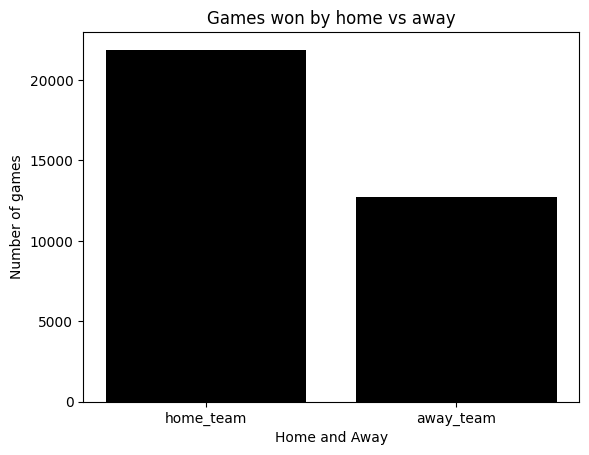

In [308]:
# let us plot a graph to show the numer of games won by home vs away
plt.bar(df2.index, df2.values, color = 'black')
plt.title('Games won by home vs away')
plt.xlabel('Home and Away')
plt.ylabel('Number of games')

plt.show()


### Question 6 Number of proportion of goals that are score by penalty

In [329]:
penalty_counts = goal['penalty'].value_counts()
penalty_counts

penalty
False    38416
True      2697
Name: count, dtype: int64

In [349]:
proportion_penalty = penalty_counts[True] / goal.shape[0]
print(f'The proportion of goals scored by penalty is {proportion_penalty: .2%}')

The proportion of goals scored by penalty is  6.56%
